In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow_datasets as tfds

import src.my_dataset  # Register `my_dataset`

ds = tfds.load('my_dataset')  # `my_dataset` registered

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)


4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


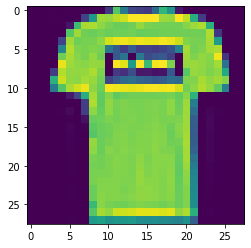

In [6]:
plt.imshow(x_train[1])

In [24]:
latent_dim = 2


class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4345 - val_loss: 0.4087
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3998 - val_loss: 0.3954
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3894 - val_loss: 0.3869
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3821 - val_loss: 0.3811
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3781 - val_loss: 0.3790
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3767 - val_loss: 0.3782
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - val_loss: 0.3777
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - val_loss: 0.3773
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - val_loss: 0.3771
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.375

In [25]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


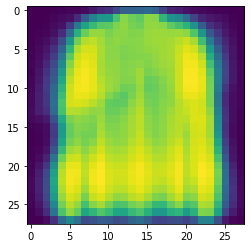

In [26]:
plt.imshow(decoded_imgs[1])

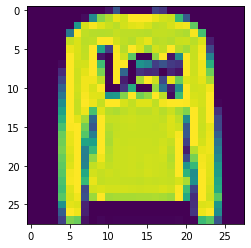

In [16]:
plt.imshow(x_test[1])